In [2]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Reading the dataset
datasetGD1 = pd.read_csv('./Solar_Power/Plant_1_Generation_Data.csv')

# See the shape of the dataset
print(datasetGD1.shape)


# Some statitistics of the dataset
datasetGD1.describe()


(68778, 7)


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [4]:
datasetGD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
datasetGD1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [6]:
datasetGD1.head(65)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
60,15-05-2020 00:30,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0
61,15-05-2020 00:30,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0
62,15-05-2020 00:30,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0
63,15-05-2020 00:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0


In [7]:
datasetGD1['DATE_TIME'] = pd.to_datetime(datasetGD1['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [8]:
datasetGD1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [9]:
# adding another column for only date (without time)
datasetGD1['date'] = pd.to_datetime(datasetGD1['DATE_TIME']).dt.normalize()

In [10]:
datasetGD1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15


## What is the mean value of Daily Yield

In [11]:
# What is the mean value of Daily Yield
# group the rows based on "date" and take the sum from DAILY_YIELD column
meanYIELD = datasetGD1.groupby(["date"]).DAILY_YIELD.mean().reset_index()

In [12]:
meanYIELD.head()

,date,DAILY_YIELD
0,2020-05-15,2586.279926
1,2020-05-16,3464.273323
2,2020-05-17,3695.106669
3,2020-05-18,2429.114465
4,2020-05-19,2962.975236


In [13]:
# It should give exactly the number of days = 34
print(meanYIELD.shape)

(34, 2)


Text(0, 0.5, 'mean value of daily yield')

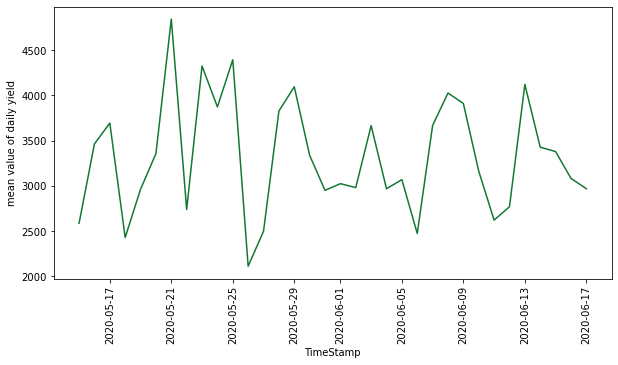

In [18]:
# plot the date and mean value of daily yield
plt.figure(figsize=(10,5))
plt.plot(meanYIELD['date'], meanYIELD['DAILY_YIELD'], color= '#117733')

plt.xticks(rotation='vertical')
plt.xlabel('TimeStamp')
plt.ylabel('mean value of daily yield')

Text(0, 0.5, 'mean value of daily yield')

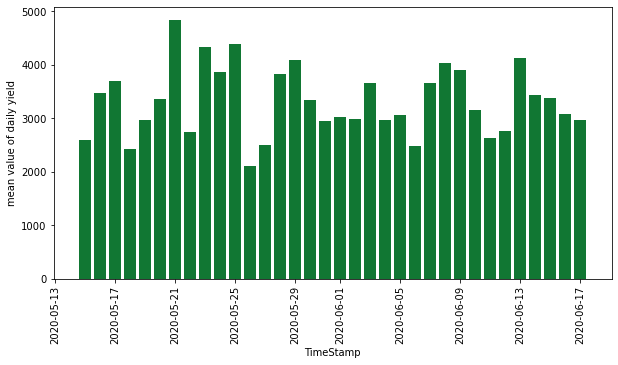

In [19]:
# plot the date and mean value of daily yield by using bar graph
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(meanYIELD['date'], meanYIELD['DAILY_YIELD'], color= '#117733')

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('mean value of daily yield')



## How Many inverters are There for each plant

In [20]:
# how many inverters are There for each plant
from collections import Counter
inverters_key = Counter(datasetGD1['SOURCE_KEY']).keys()
# number of inverters
print('\n Number of inverters: ',len(inverters_key))

print('\n Key of inverters: \n\n', inverters_key) # finding unique elements in SOURCE_KEY which shows the inverters


# total number of measurements from each inverter over the whole 34 days
Counter(datasetGD1['SOURCE_KEY']).values() # finding frequency of elements in SOURCE_KEY


 Number of inverters:  22

 Key of inverters: 

 dict_keys(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD', '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU', 'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq', 'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3', 'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV', 'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2', 'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof', 'YxYtjZvoooNbGkE'])


dict_values([3154, 3119, 3118, 3133, 3124, 3133, 3118, 3130, 3123, 3119, 3155, 3125, 3130, 3125, 3124, 3124, 3125, 3126, 3126, 3119, 3124, 3104])

# What is the Maximum and Minimum amount of DC & AC

In [22]:
# What is the maximum and minimum amount of DC
# group the rows based on date and make max of DC_POWER 
sumDCPower = datasetGD1.groupby(["date"]).DC_POWER.sum().reset_index()
maxDCPower = sumDCPower['DC_POWER'].max()
minDCPower = sumDCPower['DC_POWER'].min()
print('\n Maximum amount of DC in each day:\n\n',maxDCPower)
print('\n Minimum amount of DC in each day:\n\n',minDCPower)

# What is the maximum and minimum amount of AC
sumACPower = datasetGD1.groupby(["date"]).AC_POWER.sum().reset_index()
maxACPower = sumACPower['AC_POWER'].max()
minACPower = sumACPower['AC_POWER'].min()
print('\n Maximum amount of AC in each day:\n\n',maxACPower)
print('\n Minimum amount of AC in each day:\n\n',minACPower)



 Maximum amount of DC in each day:

 7898965.11305902

 Minimum amount of DC in each day:

 4812548.535706401

 Maximum amount of AC in each day:

 771576.1613118657

 Minimum amount of AC in each day:

 470969.70892881916


# Which SOURCE_KEY has produced max DC_Power & Graph

         SOURCE_KEY      DC_POWER
0   1BY6WEcLGh8j5v7  9.063716e+06
1   1IF53ai7Xc0U56Y  1.006294e+07
2   3PZuoBAID5Wc2HD  1.004313e+07
3   7JYdWkrLSPkdwr4  9.815350e+06
4   McdE0feGgRqW7Ca  1.003212e+07
5   VHMLBKoKgIrUVDU  1.005725e+07
6   WRmjgnKYAwPKWDb  9.838489e+06
7   YxYtjZvoooNbGkE  9.869145e+06
8   ZnxXDlPa8U1GXgE  9.997405e+06
9   ZoEaEvLYb1n2sOq  9.803128e+06
10  adLQvlD726eNBSB  1.019778e+07
11  bvBOhCH3iADSZry  8.925490e+06
12  iCRJl6heRkivqQ3  9.987733e+06
13  ih0vzX44oOqAx2f  9.695845e+06
14  pkci93gMrogZuBj  9.895623e+06
15  rGa61gmuvPhdLxV  9.881965e+06
16  sjndEbLyjtCKgGv  9.835197e+06
17  uHbuxQJl8lW7ozc  9.985363e+06
18  wCURE6d3bPkepu2  9.911622e+06
19  z9Y9gH1T5YWrNuG  9.797002e+06
20  zBIq5rxdHJRwDNY  9.820452e+06
21  zVJPv84UY57bAof  9.956927e+06

 Maximum prodcued DC power:

 10197781.559583593

 The index of maximum prodcued DC power:

 10

 The Source Key of the inverter giving the maximum prodcued DC power:

 adLQvlD726eNBSB


Text(0, 0.5, 'Total DC power over 34 days')

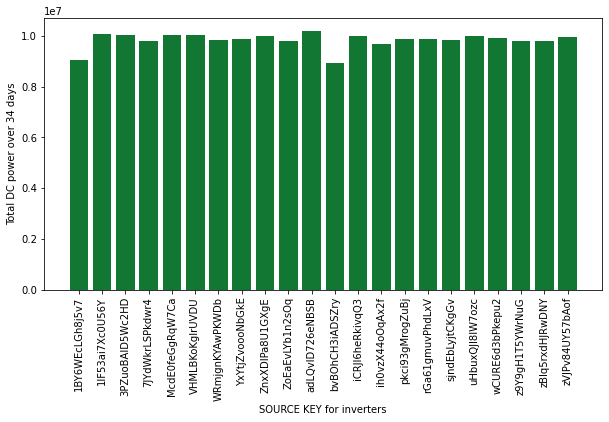

In [24]:
# which SOURCE_KEY has produced max DC_Power
TotalProducedDC = datasetGD1.groupby(["SOURCE_KEY"]).DC_POWER.sum().reset_index()
print(TotalProducedDC)
maxDCPower_inverter = TotalProducedDC['DC_POWER'].max()
maxDCPower_index = TotalProducedDC['DC_POWER'].idxmax()
MaxDCPower_inverter = TotalProducedDC['SOURCE_KEY'][10]
print('\n Maximum prodcued DC power:\n\n',maxDCPower_inverter)
print('\n The index of maximum prodcued DC power:\n\n',maxDCPower_index)
print('\n The Source Key of the inverter giving the maximum prodcued DC power:\n\n',MaxDCPower_inverter)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.xticks(rotation='vertical')
ax.bar(TotalProducedDC['SOURCE_KEY'], TotalProducedDC['DC_POWER'], color= '#117733')

ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Total DC power over 34 days')

# Which SOURCE_KEY has produced max AC_Power

         SOURCE_KEY       AC_POWER
0   1BY6WEcLGh8j5v7  886665.326069
1   1IF53ai7Xc0U56Y  984007.153452
2   3PZuoBAID5Wc2HD  982068.208928
3   7JYdWkrLSPkdwr4  959906.307338
4   McdE0feGgRqW7Ca  981080.708217
5   VHMLBKoKgIrUVDU  983449.000642
6   WRmjgnKYAwPKWDb  962138.298813
7   YxYtjZvoooNbGkE  965127.756186
8   ZnxXDlPa8U1GXgE  977644.316190
9   ZoEaEvLYb1n2sOq  958700.484522
10  adLQvlD726eNBSB  997125.156663
11  bvBOhCH3iADSZry  873237.550835
12  iCRJl6heRkivqQ3  976688.499523
13  ih0vzX44oOqAx2f  948272.430359
14  pkci93gMrogZuBj  967719.414521
15  rGa61gmuvPhdLxV  966395.835123
16  sjndEbLyjtCKgGv  961917.916550
17  uHbuxQJl8lW7ozc  976462.011390
18  wCURE6d3bPkepu2  969260.200356
19  z9Y9gH1T5YWrNuG  958094.071906
20  zBIq5rxdHJRwDNY  960419.146543
21  zVJPv84UY57bAof  973677.901192

 Maximum prodcued AC power:

 997125.156662539

 The index of maximum prodcued AC power:

 10

 The Source Key of the inverter giving the maximum prodcued AC power:

 adLQvlD726eNBSB


Text(0, 0.5, 'Total AC power over 34 days')

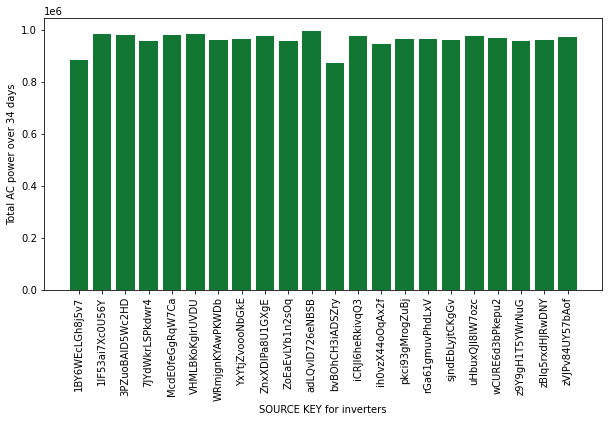

In [25]:
# which SOURCE_KEY has produced max AC_Power
TotalProducedAC = datasetGD1.groupby(["SOURCE_KEY"]).AC_POWER.sum().reset_index()
print(TotalProducedAC)
maxACPower_inverter = TotalProducedAC['AC_POWER'].max()
maxACPower_index = TotalProducedAC['AC_POWER'].idxmax()
MaxACPower_inverter = TotalProducedAC['SOURCE_KEY'][10]
print('\n Maximum prodcued AC power:\n\n',maxACPower_inverter)
print('\n The index of maximum prodcued AC power:\n\n',maxACPower_index)
print('\n The Source Key of the inverter giving the maximum prodcued AC power:\n\n',MaxACPower_inverter)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.xticks(rotation='vertical')
ax.bar(TotalProducedAC['SOURCE_KEY'], TotalProducedAC['AC_POWER'], color= '#117733')

ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Total AC power over 34 days')


# Rank the inverters based on the total DC power they produce over 34 days

In [26]:
# Rank the inverters based on the total DC power they produce over 34 days
TotalProducedDC = datasetGD1.groupby(["SOURCE_KEY"]).DC_POWER.sum().reset_index()
# add a new column for rank
TotalProducedDC['rank'] = TotalProducedDC['DC_POWER'].rank(ascending=False)
#print(TotalProducedDC)
# sort based on rank
SortTotalProducedDC = TotalProducedDC.sort_values('rank')
TotalProducedDC.sort_values('rank')


,SOURCE_KEY,DC_POWER,rank
10,adLQvlD726eNBSB,1.019778e+07,1.0
1,1IF53ai7Xc0U56Y,1.006294e+07,2.0
5,VHMLBKoKgIrUVDU,1.005725e+07,3.0
2,3PZuoBAID5Wc2HD,1.004313e+07,4.0
4,McdE0feGgRqW7Ca,1.003212e+07,5.0
8,ZnxXDlPa8U1GXgE,9.997405e+06,6.0
12,iCRJl6heRkivqQ3,9.987733e+06,7.0
17,uHbuxQJl8lW7ozc,9.985363e+06,8.0
21,zVJPv84UY57bAof,9.956927e+06,9.0
18,wCURE6d3bPkepu2,9.911622e+06,10.0


Text(0, 0.5, 'Ranked Total DC power over 34 days')

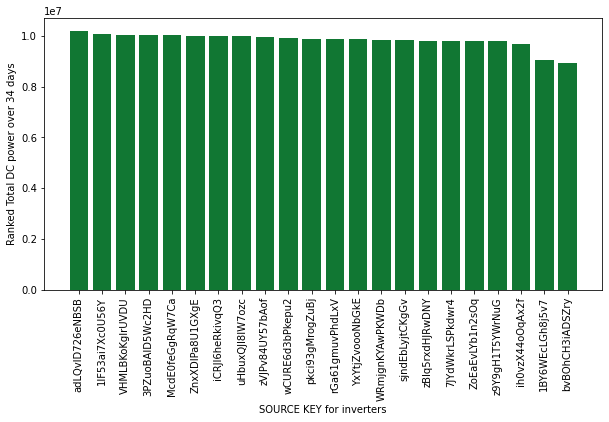

In [28]:
# Graph for Rank the inverters based on the total DC power they produce over 34 days
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(SortTotalProducedDC['SOURCE_KEY'], SortTotalProducedDC['DC_POWER'], color= '#117733')

plt.xticks(rotation='vertical')
ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Ranked Total DC power over 34 days')


# Rank the inverters based on the total AC power they produce over 34 days

In [29]:
# Rank the inverters based on the total AC power they produce over 34 days
TotalProducedAC = datasetGD1.groupby(["SOURCE_KEY"]).AC_POWER.sum().reset_index()
# add a new column for rank
TotalProducedAC['rank'] = TotalProducedAC['AC_POWER'].rank(ascending=False)
#print(TotalProducedDC)
# sort based on rank
SortTotalProducedAC = TotalProducedAC.sort_values('rank')
TotalProducedAC.sort_values('rank')


,SOURCE_KEY,AC_POWER,rank
10,adLQvlD726eNBSB,997125.156663,1.0
1,1IF53ai7Xc0U56Y,984007.153452,2.0
5,VHMLBKoKgIrUVDU,983449.000642,3.0
2,3PZuoBAID5Wc2HD,982068.208928,4.0
4,McdE0feGgRqW7Ca,981080.708217,5.0
8,ZnxXDlPa8U1GXgE,977644.316190,6.0
12,iCRJl6heRkivqQ3,976688.499523,7.0
17,uHbuxQJl8lW7ozc,976462.011390,8.0
21,zVJPv84UY57bAof,973677.901192,9.0
18,wCURE6d3bPkepu2,969260.200356,10.0


Text(0, 0.5, 'Ranked Total AC power over 34 days')

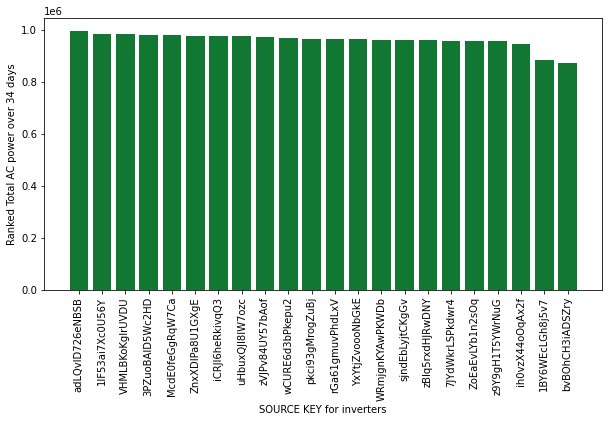

In [30]:
# Graph for Rank the inverters based on the total AC power they produce over 34 days
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(SortTotalProducedAC['SOURCE_KEY'],SortTotalProducedAC['AC_POWER'], color= '#117733')

plt.xticks(rotation='vertical')
ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Ranked Total AC power over 34 days')


# Graphs that Explain The Patterns For ttributes Independent of Other Variables

Text(0, 0.5, 'DC_POWER')

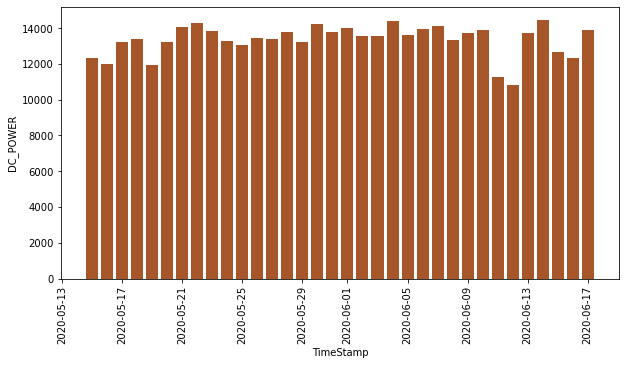

In [31]:
# plot nTimeStamp for DC_POWER
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD1['date'], datasetGD1['DC_POWER'], color= '#a65628')

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('DC_POWER')


Text(0, 0.5, 'AC_POWER')

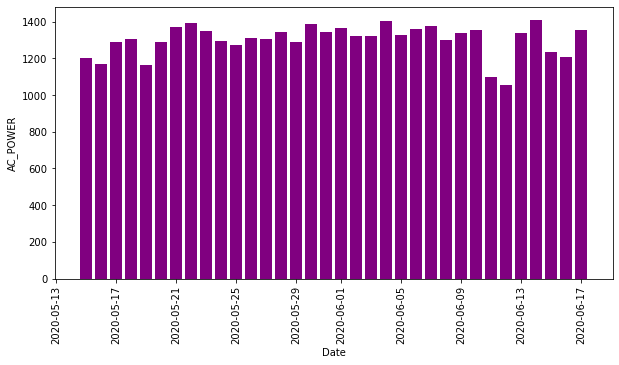

In [32]:
# plot nTimeStamp for AC_POWER
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD1['date'], datasetGD1['AC_POWER'], color= 'purple')

plt.xticks(rotation='vertical')
ax.set_xlabel('Date')
ax.set_ylabel('AC_POWER')



Text(0, 0.5, 'DAILY_YIELD')

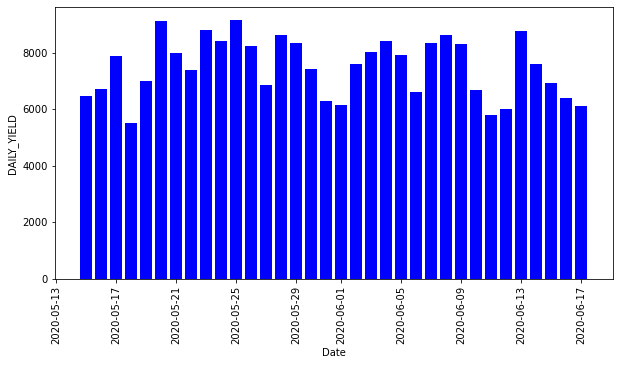

In [33]:
# plot nTimeStamp for DAILY_YIELD
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD1['date'], datasetGD1['DAILY_YIELD'], color= 'blue')

plt.xticks(rotation='vertical')
ax.set_xlabel('Date')
ax.set_ylabel('DAILY_YIELD')



Text(0, 0.5, 'TOTAL_YIELD')

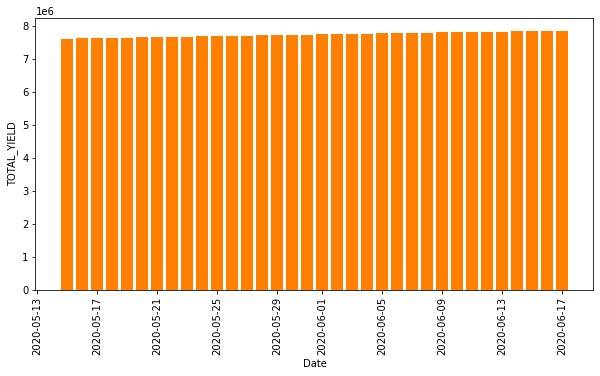

In [34]:
# plot nTimeStamp for TOTAL_YIELD
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD1['date'], datasetGD1['TOTAL_YIELD'], color= '#ff7f00')

plt.xticks(rotation='vertical')
ax.set_xlabel('Date')
ax.set_ylabel('TOTAL_YIELD')



In [49]:
datasetGD1['date'] = np.array(datasetGD1['date'])
datasetGD1['date']

0       2020-05-15
1       2020-05-15
2       2020-05-15
3       2020-05-15
4       2020-05-15
           ...    
68773   2020-06-17
68774   2020-06-17
68775   2020-06-17
68776   2020-06-17
68777   2020-06-17
Name: date, Length: 68778, dtype: datetime64[ns]

<ipython-input-84-d400a5128210>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(datasetGD1['date'])


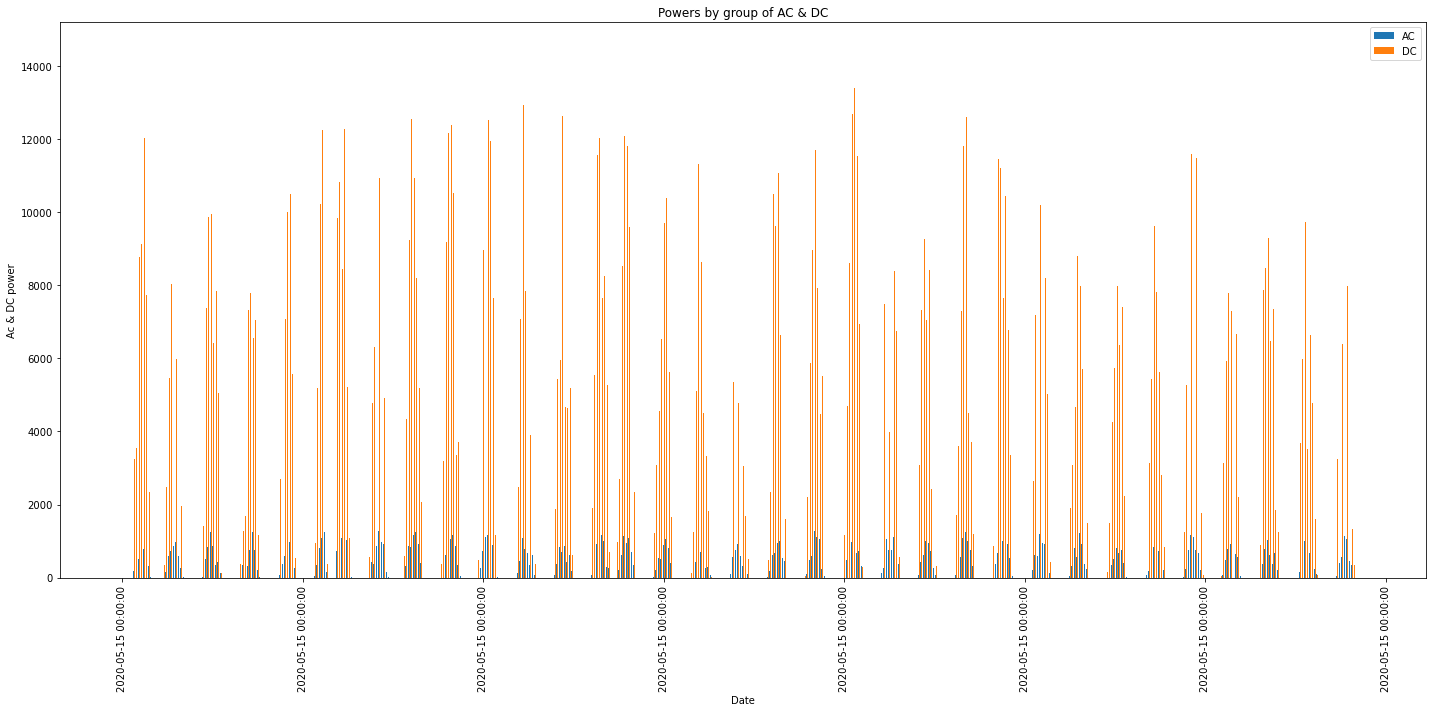

In [84]:
x = np.arange(len(datasetGD1['date']))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, datasetGD1['AC_POWER'], width, label='AC')
rects2 = ax.bar(x + width/2, datasetGD1['DC_POWER'], width, label='DC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Powers by group of AC & DC')
ax.set_xlabel('Date')
ax.set_ylabel('Ac & DC power')
plt.xticks(rotation='vertical')


#ax.set_xticks(x)
ax.set_xticklabels(datasetGD1['date'])
ax.legend()


fig.tight_layout()
plt.xticks(rotation='vertical')
plt.show()